In [68]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [34]:
weather_data = pd.read_csv('data/weather_data/weather.csv')
weather_data_formated = weather_data.copy()
weather_data_formated['timestamp'] = weather_data['timestamp']+60*60
weather_data_formated['timestamp'] = pd.to_datetime(weather_data_formated['timestamp'], unit='s',utc=True)
weather_data_formated['year'] = weather_data_formated['timestamp'].dt.year
weather_data_formated['month'] = weather_data_formated['timestamp'].dt.month
weather_data_formated['day'] = weather_data_formated['timestamp'].dt.day
weather_data_formated['hour'] = weather_data_formated['timestamp'].dt.hour
weather_data_formated = weather_data_formated.drop('timestamp', axis = 1)
weather_data_formated = weather_data_formated.groupby(['year','month','day','hour']).mean().reset_index()
weather_data_formated

,year,month,day,hour,mm_precip,temperature
0,2019,1,1,0,0.0,9.00
1,2019,1,1,1,0.0,9.10
2,2019,1,1,2,0.0,8.45
3,2019,1,1,3,0.0,7.55
4,2019,1,1,4,0.0,7.50
...,...,...,...,...,...,...
17513,2020,12,30,19,0.0,9.60
17514,2020,12,30,20,0.0,9.00
17515,2020,12,30,21,0.0,8.40
17516,2020,12,30,22,0.0,8.20


In [38]:
years = [2019,2020]
for year in years:
    data = weather_data_formated[weather_data_formated['year'] == year]
    data.to_csv('data/weather_data/weather_data_{}.csv'.format(year))

         ID_CP COD_POSTAL     ALTA_DB  CODIGO_INE  \
0  10010000001      01193  2015-07-09        1001   
1  10010000002      01240  2015-07-09        1001   
2  10020000001      01468  2015-07-09        1002   
3  10020000002      01470  2015-07-09        1002   
4  10020000003      01468  2015-07-09        1002   

                                            geometry  
0  POLYGON ((-2.53060 42.81828, -2.53061 42.81814...  
1  POLYGON ((-2.49361 42.85699, -2.49361 42.85699...  
2  POLYGON ((-2.97525 42.93816, -2.97526 42.93815...  
3  POLYGON ((-2.91984 43.06241, -2.93543 43.06835...  
4  POLYGON ((-3.01941 43.03516, -3.01761 43.03644...  


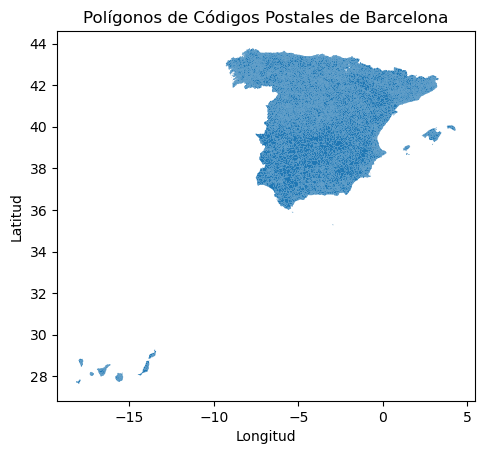

In [18]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Ruta al archivo shapefile descargado
shapefile_path = 'data/locations_data/geo_data/codigos_postales.shp'

# Cargar el shapefile en un GeoDataFrame
gdf = gpd.read_file(shapefile_path)

# Visualizar el GeoDataFrame
print(gdf.head())

# Graficar los polígonos
gdf.plot()
plt.title('Polígonos de Códigos Postales de Barcelona')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.show()

In [19]:
codigos_postales_bcn = ['0'+str(i) for i in range(8001,8043)]

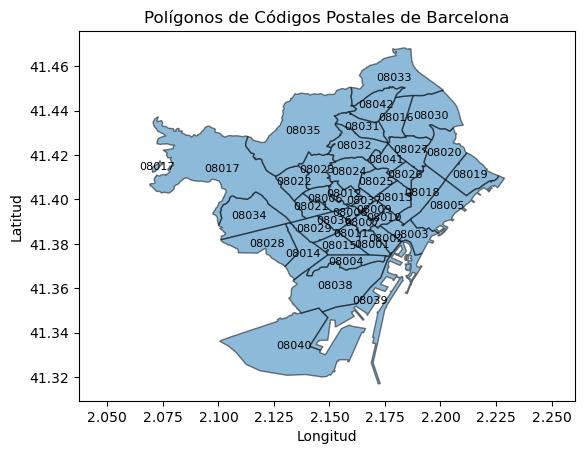

In [20]:
poligs_bcn = gdf[gdf['COD_POSTAL'].isin(codigos_postales_bcn)]
fig, ax = plt.subplots()

# Graficar los polígonos
poligs_bcn.plot(ax=ax, edgecolor='k', alpha=0.5)

# Agregar el código postal en el centro de cada polígono
for idx, row in poligs_bcn.iterrows():
    centroid = row.geometry.centroid
    postal_code = row['COD_POSTAL']
    ax.text(centroid.x, centroid.y, postal_code, fontsize=8, ha='center', va='center')

# Configuraciones adicionales
plt.title('Polígonos de Códigos Postales de Barcelona')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.axis('equal')  # Configurar el aspecto de los ejes para que la escala sea igual

# Mostrar el mapa
plt.show()

In [51]:
locations = pd.read_csv('data/locations_data/barna_pics.csv', encoding = 'utf-16').groupby('addresses_zip_code').size().reset_index()
locations.columns = ['addresses_zip_code', 'rating']
locations['addresses_zip_code'] = '0'+locations['addresses_zip_code'].astype(str)

In [52]:
poligs_bcn_locs = pd.merge(poligs_bcn, locations, left_on = 'COD_POSTAL', right_on = 'addresses_zip_code')
poligs_bcn_locs.head()

,ID_CP,COD_POSTAL,ALTA_DB,CODIGO_INE,geometry,addresses_zip_code,rating
0,80190000032,08011,2015-07-09,8019,"POLYGON ((2.15719 41.38274, 2.15722 41.38289, ...",08011,5
1,80190000033,08002,2015-07-09,8019,"POLYGON ((2.17281 41.38821, 2.17433 41.38705, ...",08002,40
2,80190000034,08001,2015-07-09,8019,"POLYGON ((2.16767 41.38594, 2.16981 41.38569, ...",08001,30
3,80190000035,08021,2015-07-09,8019,"POLYGON ((2.13793 41.40284, 2.14321 41.39888, ...",08021,7
4,80190000036,08029,2015-07-09,8019,"POLYGON ((2.14826 41.38963, 2.15014 41.38821, ...",08029,9


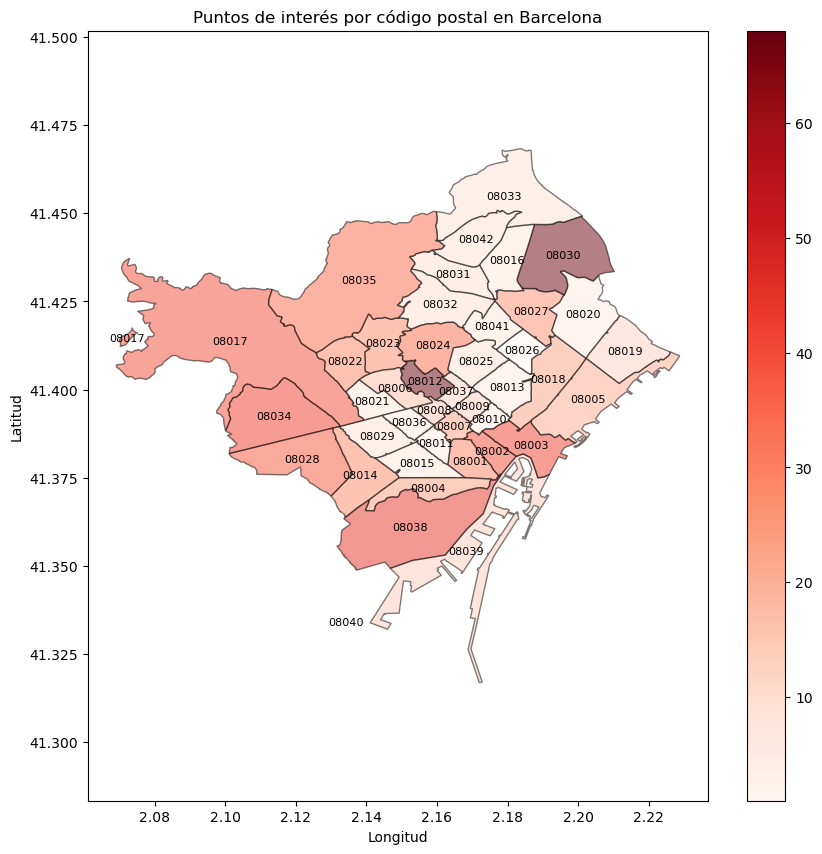

In [67]:
fig, ax = plt.subplots(figsize = (10,10))

# Graficar los polígonos
poligs_bcn_locs.plot(ax=ax, edgecolor='k', alpha=0.5, column = 'rating', cmap = 'Reds', legend = True)

# Agregar el código postal en el centro de cada polígono
for idx, row in poligs_bcn.iterrows():
    centroid = row.geometry.centroid
    postal_code = row['COD_POSTAL']
    ax.text(centroid.x, centroid.y, postal_code, fontsize=8, ha='center', va='center')

# Configuraciones adicionales
plt.title('Puntos de interés por código postal en Barcelona')
plt.xlabel('Longitud')
plt.ylabel('Latitud')
plt.axis('equal')  # Configurar el aspecto de los ejes para que la escala sea igual

# Mostrar el mapa
plt.show()

In [72]:
weather_data_2 = pd.read_csv('data/weather_data/weather_2.csv')
weather_data_3 = pd.read_csv('data/weather_data/weather_3.csv')
weather_data_4 = pd.read_csv('data/weather_data/weather_4.csv')

weather_data = pd.concat((pd.concat((weather_data_2, weather_data_3)), weather_data_4))


weather_data_formated = weather_data.copy()
weather_data_formated['timestamp'] = weather_data['timestamp']+60*60
weather_data_formated['timestamp'] = pd.to_datetime(weather_data_formated['timestamp'], unit='s',utc=True)
weather_data_formated['year'] = weather_data_formated['timestamp'].dt.year
weather_data_formated['month'] = weather_data_formated['timestamp'].dt.month
weather_data_formated['day'] = weather_data_formated['timestamp'].dt.day
weather_data_formated['hour'] = weather_data_formated['timestamp'].dt.hour
weather_data_formated = weather_data_formated.drop('timestamp', axis = 1)
weather_data_formated = weather_data_formated.groupby(['year','month','day','hour']).mean().reset_index()
weather_data_formated

,year,month,day,hour,mm_precip,temperature
0,2021,1,1,0,0.0,8.00
1,2021,1,1,1,0.0,8.15
2,2021,1,1,2,0.0,7.85
3,2021,1,1,3,0.0,6.35
4,2021,1,1,4,0.0,7.70
...,...,...,...,...,...,...
29967,2024,6,4,18,0.0,20.45
29968,2024,6,4,19,0.0,19.95
29969,2024,6,4,20,0.0,19.60
29970,2024,6,4,21,0.0,19.20


In [73]:
years = [2021,2022, 2023, 2024]
for year in years:
    data = weather_data_formated[weather_data_formated['year'] == year]
    data.to_csv('data/weather_data/weather_data_{}.csv'.format(year))